In [1]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import os
import pandas as pd

In [2]:
outputfile_SD1D = "outputSD1D_case-01_qconv.csv"

# Normalization values used in SD1D
nnorm = 1e+20             # 1/m^3
tnorm = 100.0             # eV
pnorm = 1602.0            # Pa
cs0   = 69205.61141651045 # m/s

# Data from SD1D simulation
df1 = pd.read_csv(os.path.abspath(outputfile_SD1D), skiprows=7)
X1 = df1.get("ypos")
M1 = df1.get("M")
N1 = df1.get("Ne")
T1 = df1.get("Te")*tnorm
P1 = df1.get("P")*tnorm

# Data from Sparselizard simulation
X2 = pd.read_csv(os.path.abspath("M.csv")).get("arc_length")
M2 = pd.read_csv(os.path.abspath("M.csv")).get("M")
N2 = pd.read_csv(os.path.abspath("N.csv")).get("N")
T2 = pd.read_csv(os.path.abspath("T.csv")).get("T")
P2 = 2*N2*T2


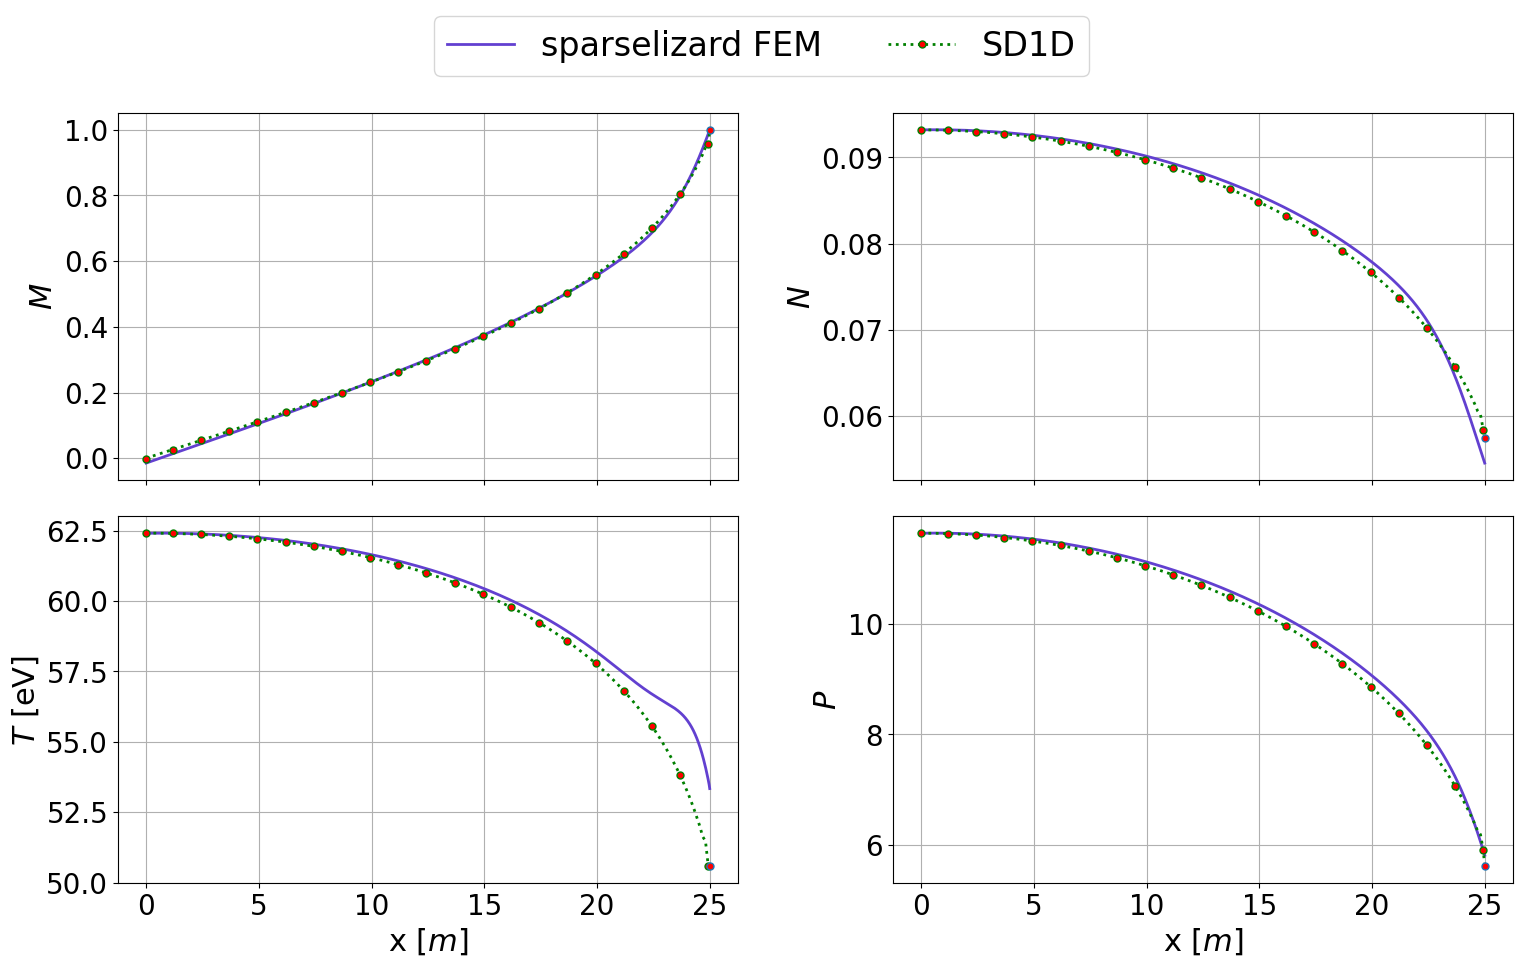

In [3]:
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2, 2, figsize=(18,10), sharex=True)
 
# M plot
ax1.plot(X2, M2, color="#6240D0", linestyle="solid", linewidth=2, label="sparselizard FEM")
ax1.plot(X1, M1, color="green", linestyle="dotted", linewidth=2.5, label="SD1D", marker="o", markevery=10, ms=5, mfc='r')
ax1.plot(X1[-1:], M1[-1:], marker="o", markevery=1, ms=5, mfc='r') # last point

# N plot
ax2.plot(X2, N2, color="#6240D0", linestyle="solid", linewidth=2, label="sparselizard FEM")
ax2.plot(X1, N1, color="green", linestyle="dotted", linewidth=2.5, label="SD1D", marker="o", markevery=10, ms=5, mfc='r')
ax2.plot(X1[-1:], N1[-1:], marker="o", markevery=1, ms=5, mfc='r') # last point

# T plot
ax3.plot(X2, T2, color="#6240D0", linestyle="solid", linewidth=2, label="sparselizard FEM")
ax3.plot(X1, T1, color="green", linestyle="dotted", linewidth=2.5, label="SD1D", marker="o", markevery=10, ms = 5, mfc = 'r')
ax3.plot(X1[-1:], T1[-1:], marker="o", markevery=1, ms=5, mfc='r') # last point

# Nn plot
ax4.plot(X2, P2, color="#6240D0", linestyle="solid", linewidth=2, label="sparselizard FEM")
ax4.plot(X1, P1, color="green", linestyle="dotted", linewidth=2.5, label="SD1D", marker="o", markevery=10, ms=5, mfc='r')
ax4.plot(X1[-1:], P1[-1:], marker="o", markevery=1, ms=5, mfc='r') # last point

for ax in [ax1, ax2, ax3, ax4]:
    #ax.legend(fontsize=20)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.grid()

for ax in [ax3, ax4]:
    ax.set_xlabel("x $[m]$", fontsize=22)

ax1.set_ylabel("$M$", fontsize=22)
ax2.set_ylabel("$N$", fontsize=22)
ax3.set_ylabel("$T$ [eV]", fontsize=22)
ax4.set_ylabel("$P$", fontsize=22)

subplot_labels = [ax.get_legend_handles_labels() for ax in fig.axes[:1]]
subplots, labels = [sum(lol, []) for lol in zip(*subplot_labels)]
fig.legend(subplots, labels, loc='upper center', ncol=2, fontsize=24)

# set the spacing between subplots
plt.subplots_adjust(wspace=0.25, hspace=0.1) # or
#fig.tight_layout()

fig.savefig("SD1D_Sparselizard_verification_modified_Case01.png", bbox_inches='tight')
fig.savefig("SD1D_Sparselizard_verification_modified_Case01.svg", bbox_inches='tight')
plt.show()